# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [193]:
import pandas as pd
import csv
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import datetime
#from api_keys import weather_api_key
weather_api_key = "45e804ff91673b79da456b71cf0654c2"

   
file_to_load = ("worldcities.csv")
cities_data = pd.read_csv(file_to_load, sep = ',')
df=pd.DataFrame(cities_data)


## Generate Cities List

In [194]:
List_Cities_df = df['city'].head(643)
len(List_Cities_df)
#url = "http://api.openweathermap.org/data/2.5/box/city?"
#bbox= "10,42,15,37,10"
#130,30,90,60,50


643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [195]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = List_Cities_df
print(f"Beginning Data Retrieval")
print(f"---------------------------------")
# Build query URL
Latitude=[]
Longitude =[]
Temperature= []
Humidity = []
Wind_Speed = []
Cloudiness = []
List_city = []
Max_Temp= []
Date= []
Country = []
metrics= "Imperial"
for city in List_Cities_df.head(50):
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + metrics
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        Latitude.append(weather_json['coord']['lat'])
        Longitude.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Temperature.append(weather_json['main']['temp'])
        Humidity.append(weather_json['main']['humidity'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Cloudiness.append(weather_json['clouds']['all'])
        Date.append(weather_json['dt'])
        Country.append(weather_json['sys']['country'])
        List_city.append(city)
        print(f"Processing Record | {city}")  
        weather_json
    except:
    # Append null values
        print(f"{city} not found. Skipping")
        pass
        
# Get the temperature from the response
Temperature[5]

Beginning Data Retrieval
---------------------------------
Processing Record | Tokyo
Processing Record | Jakarta
Processing Record | Delhi
Processing Record | Mumbai
Processing Record | Manila
Processing Record | Shanghai
Processing Record | São Paulo
Processing Record | Seoul
Processing Record | Mexico City
Processing Record | Guangzhou
Processing Record | Beijing
Processing Record | Cairo
Processing Record | New York
Kolkāta not found. Skipping
Processing Record | Moscow
Processing Record | Bangkok
Processing Record | Buenos Aires
Processing Record | Shenzhen
Processing Record | Dhaka
Processing Record | Lagos
Processing Record | Istanbul
Processing Record | Ōsaka
Processing Record | Karachi
Processing Record | Bangalore
Processing Record | Tehran
Processing Record | Kinshasa
Processing Record | Ho Chi Minh City
Processing Record | Los Angeles
Processing Record | Rio de Janeiro
Processing Record | Nanyang
Processing Record | Baoding
Processing Record | Chennai
Processing Record | Che

78.37

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [196]:
Citi_Data_Dict = {
    "City":List_city,
    "Latitude":Latitude,
    "Longitude":Longitude,
    "Max_Temp":Max_Temp,
    "Temperature":Temperature,
    "Humidity":Humidity,
    "Wind_Speed":Wind_Speed,
    "Cloudiness":Cloudiness,
    "Date":Date,
    "Country":Country    
    }
Citi_Data_DF = pd.DataFrame(Citi_Data_Dict)
Citi_Data_DF.to_csv(r'..\starter_code\City_data.csv', index = False)

Citi_Data_DF

,City,Latitude,Longitude,Max_Temp,Temperature,Humidity,Wind_Speed,Cloudiness,Date,Country
0,Tokyo,35.6895,139.6917,73.71,71.56,100,17.27,75,1627324025,JP
1,Jakarta,-6.2146,106.8451,80.53,78.42,71,4.18,9,1627324050,ID
2,Delhi,28.6667,77.2167,89.31,86.09,84,0.00,75,1627323815,IN
3,Mumbai,19.0144,72.8479,82.38,82.38,83,11.50,75,1627323969,IN
4,Manila,14.6042,120.9822,84.20,83.07,78,17.00,75,1627323951,PH
5,Shanghai,31.2222,121.4581,78.93,78.37,96,3.00,75,1627323830,CN
6,São Paulo,-23.5475,-46.6361,82.29,79.54,31,6.91,0,1627323914,BR
7,Seoul,37.5683,126.9778,82.00,79.95,74,2.30,0,1627323990,KR
8,Mexico City,19.4285,-99.1277,73.11,71.83,42,1.99,20,1627323949,MX
9,Guangzhou,23.1167,113.2500,88.88,88.16,59,6.78,100,1627323813,CN


In [197]:
Citi_Data_DF.describe()

,Latitude,Longitude,Max_Temp,Temperature,Humidity,Wind_Speed,Cloudiness,Date
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,24.357327,63.670629,80.061224,78.879388,74.387755,6.922041,55.795918,1.627324e+09
std,19.375588,71.908807,6.225226,6.331835,19.589343,5.538087,39.772782,9.490433e+01
min,-34.613200,-118.243700,62.020000,59.090000,17.000000,0.000000,0.000000,1.627324e+09
25%,14.604200,28.983300,76.870000,76.620000,71.000000,3.000000,12.000000,1.627324e+09
50%,30.666700,100.516700,79.200000,78.890000,79.000000,5.190000,75.000000,1.627324e+09
75%,35.694400,115.441100,84.020000,82.490000,88.000000,10.360000,92.000000,1.627324e+09
max,55.752200,139.691700,92.820000,91.110000,100.000000,24.960000,100.000000,1.627324e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [176]:
#  Get the indices of cities that have humidity over 100%.
indexNames = Citi_Data_DF[ Citi_Data_DF['Humidity'] > 100 ].index
indexNames

Int64Index([], dtype='int64')

In [179]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Clean_City_Data = Citi_Data_DF.drop(indexNames , inplace=False)
#Clean_City_Data['Date']= datetime.fromtimestamp(Clean_City_Data['Date'])
Clean_City_Data

,City,Latitude,Longitude,Max_Temp,Temperature,Humidity,Wind_Speed,Cloudiness,Date,Country
0,Tokyo,35.6895,139.6917,73.71,71.42,94,18.41,75,1627322771,JP
1,Jakarta,-6.2146,106.8451,80.53,78.42,71,4.18,9,1627322798,ID
2,Delhi,28.6667,77.2167,89.31,86.09,84,0.00,75,1627322840,IN
3,Mumbai,19.0144,72.8479,82.38,82.38,83,9.22,75,1627322833,IN
4,Manila,14.6042,120.9822,83.95,82.92,77,13.00,100,1627322725,PH
5,Shanghai,31.2222,121.4581,78.93,78.37,96,3.00,75,1627322725,CN
6,São Paulo,-23.5475,-46.6361,82.62,78.78,31,7.00,0,1627322720,BR
7,Seoul,37.5683,126.9778,80.04,79.61,56,2.13,56,1627322749,KR
8,Mexico City,19.4285,-99.1277,73.11,71.83,42,1.99,20,1627322992,MX
9,Guangzhou,23.1167,113.2500,88.88,88.16,59,6.78,100,1627322927,CN


In [180]:
Clean_City_Data.describe()


,Latitude,Longitude,Max_Temp,Temperature,Humidity,Wind_Speed,Cloudiness,Date
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,24.357327,63.670629,79.931020,78.848163,73.102041,6.834286,60.612245,1.627323e+09
std,19.375588,71.908807,6.450921,6.481324,20.210605,5.314305,38.514508,1.091775e+02
min,-34.613200,-118.243700,61.020000,59.020000,17.000000,0.000000,0.000000,1.627323e+09
25%,14.604200,28.983300,76.570000,76.370000,65.000000,3.000000,20.000000,1.627323e+09
50%,30.666700,100.516700,80.040000,78.890000,79.000000,5.190000,75.000000,1.627323e+09
75%,35.694400,115.441100,84.020000,82.380000,86.000000,9.220000,97.000000,1.627323e+09
max,55.752200,139.691700,92.280000,92.160000,99.000000,24.960000,100.000000,1.627323e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature(F)')

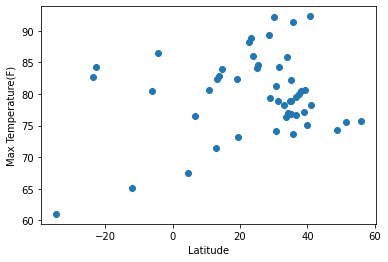

In [182]:
#catter_data = Updated_df[(Updated_df['Drug Regimen']== "Capomulin")]
#Scatter_Values = Scatter_data.groupby(['Mouse ID']).mean()
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

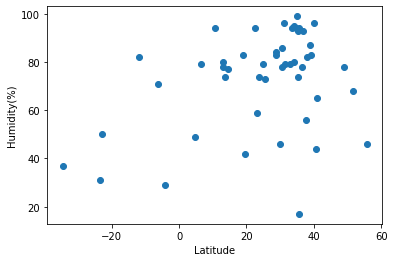

In [183]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

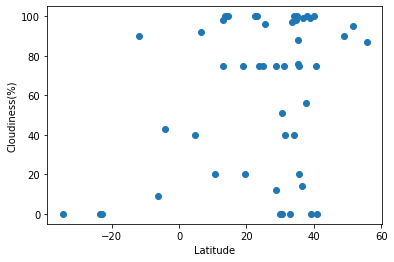

In [184]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed(mph)')

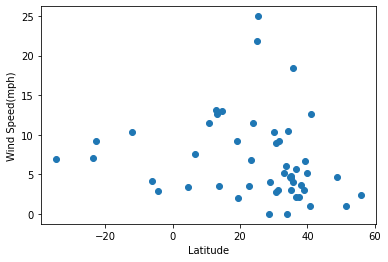

In [185]:
plt.scatter(Clean_City_Data['Latitude'],Clean_City_Data['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


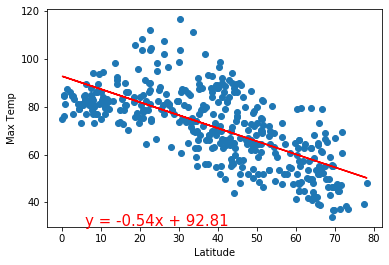

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


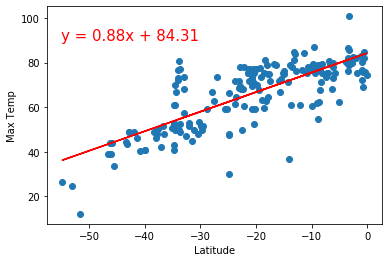

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


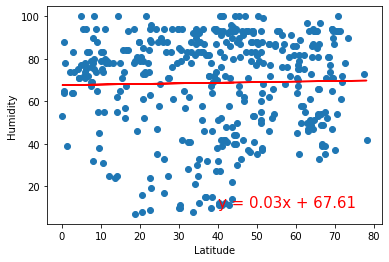

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


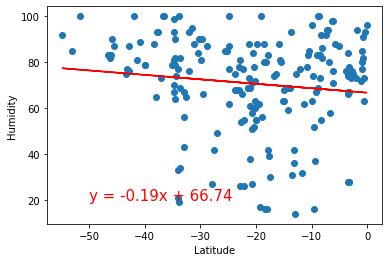

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


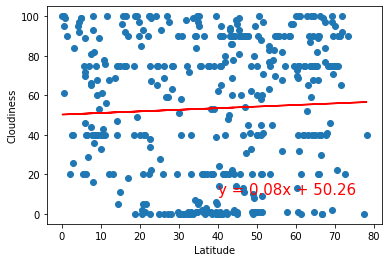

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


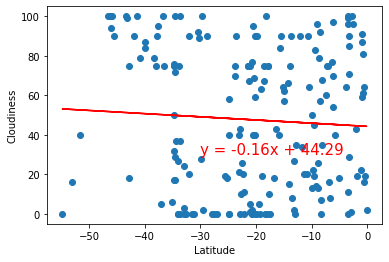

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


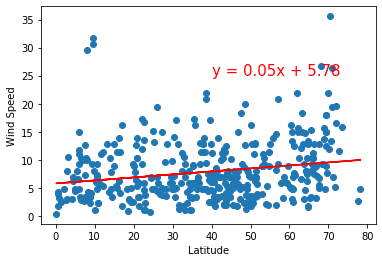

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


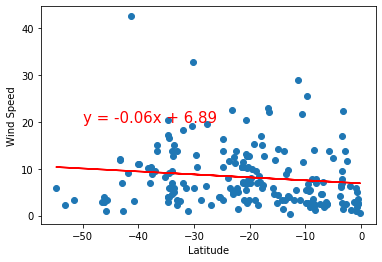